# Filtering in the Frequency Domain: Discrete Fourier Transform

In the previous sections, we learned several methods of filtering and smoothing data in the time domain. A much more powerful way of filtering data is in the *frequency* domain. 

To work in the frequency domain, we will build on the concept of Fourier series and introduce the **Fourier Transform**. The Fourier Transform allows us to determine the time scales of variability of a time series by decomposing the time series into its harmonic components. We are going to explore how this is done by using the concept of [regression](https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week3/basics_linreg.html), i.e., thinking of a Fourier series as a fitted time series where the predictors are the sines and cosines. 

Just like linear regression, we are working towards an expression of the *fraction of variance explained* by the fits with the different harmonic components.

Let's begin.

## Setting up the problem

In the case of a time series, $y(t)$ consisting of *discrete*, evenly spaced data:

Consider the domain 0 $\leq t \leq T$, where 0 and $T$ coincide with data points 1 and $N$+1, and $N$ is an even number. Recall that we can write $y(t)$ as,

$$
y(t) = A_0 + \sum_{k=1}^{N/2} A_k\text{cos}(2\pi k \frac{t}{T}) +  \sum_{k=1}^{N/2} B_k\text{sin}(2\pi k \frac{t}{T})
$$

Thus, we need to solve for the intercept, $A_0$, and the regression coefficients, $A_k$ and $B_k$.

### A few things to note...

1.  the average of each sine/cosine function on the interval from $t_1$ = 0 to $t_N+1$ = $T$ is equal to 0, so, $A_0$ = $\overline{y}$.
2.  the harmonic functions (the predictors) are mutually orthogonal on the interval, i.e., the correlation ($\rho$) between sine and cosine functions is zero and the correlation between sine or cosine functions with different integer wavenumbers is also zero.

$$
\begin{align}
\rho(\text{sin(x)},\text{cos(x)}) & = 0\\
\rho(\text{cos(x)},\text{cos(2x)}) & = 0
\end{align}
$$

3. the regression coefficients of $y(t)$ regressed onto the harmonic function can be written as,

$$
A_k, B_k = \frac{\overline{x_k^{\prime}y^{\prime}}}{\overline{x_k^{\prime 2}}}
$$

where,

$$
x_k = \text{cos}(2\pi k \frac{t}{T})
$$

for $A_k$ and 

$$
x_k = \text{sin}(2\pi k \frac{t}{T})
$$

for $B_k$.

4. the harmonic functions all have variance, $\overline{x_k^{\prime 2}} = \frac{1}{2}$, except for $k = N$/2, when the variance of the cosine term is 1 and the variance of the sine term is 0.

From the above, the solutions for each predictor, $A_k$ and $B_k$ reduce to:

$$
\begin{align}
A_k & = 2\overline{\text{cos}(2\pi k \frac{t}{T})y^{\prime}}\\
B_k & = 2\overline{\text{sin}(2\pi k \frac{t}{T})y^{\prime}}\\
A_{N/2} & = \overline{\text{cos}(2\pi k \frac{t}{T})y^{\prime}}\\
B_{N/2} & = 0
\end{align}
$$

where the 2 in front of the coefficients comes from the fact that $\overline{x_k^{\prime 2}} = \frac{1}{2}$.

Thus, $y(t)$ can be written as follows,

$$
y(t) = \overline{y} + \sum_{k=1}^{N/2-1}\left( A_k\text{cos}(2\pi k \frac{t}{T}) +  B_k\text{sin}(2\pi k \frac{t}{T})\right) + A_{N/2}\text{cos}(2\pi k \frac{t}{T})
$$

For simplicity, we can convert the above into phase-amplitude form:

$$
y(t) = \overline{y} + \sum_{k=1}^{N/2}C_k\text{cos}(2\pi k \frac{t}{T} - \phi_k)
$$

where

$$
C_k^2 = A_k^2 + B_k^2
$$

This follows from the pythagorean theorem, with $A_k$ along the $x$-axis and $B_k$ along the $y$ and the angle $\phi_k$ representing the angle between the two. Here is a little video illustrating this [conversion](https://www.youtube.com/watch?v=6zfefPUgSSY) intuitively and here two others ([here](https://www.youtube.com/watch?v=VTo8slkc11M) and [here](https://www.youtube.com/watch?v=fNuxiNGjDpY)) going through the proof.


## Fourier Decomposition

Before we move ahead to the Fourier Transform, let's just take a look at how we can generate Fourier components of time series using the above expressions. For this, we will use the [El Niño Southern Oscillation (ENSO) index](https://github.com/kls2177/ccia_files/blob/master/NINO34_monthly_Jan1958_Dec2019.csv?raw=true).



In [6]:
# load packages
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rc('font',size=16,weight='bold') #set default font size and weight for plots

We will load in the NINO3.4 ENSO index from Jan. 1958 - Dec. 2019.

In [11]:
# load data
filename = 'NINO34_monthly_Jan1958_Dec2019.csv'
ENSO = np.squeeze(np.genfromtxt(filename, delimiter = ',')) 

# let's also reshape ENSO into one long time series
Ny,Nm = ENSO.shape
ENSO = np.reshape(ENSO,Ny*Nm)

What does this time series look like? Can we see different time scales of variability in the data?

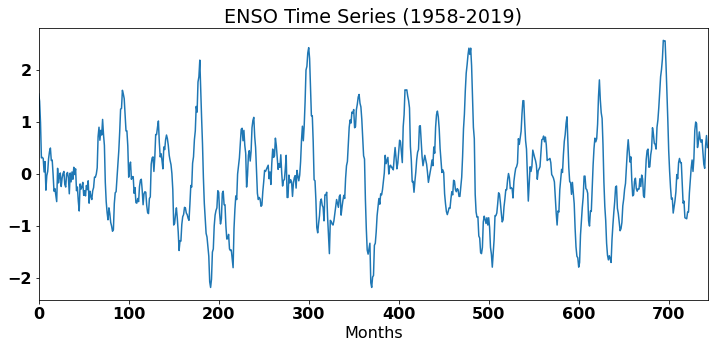

In [49]:
# plot ENSO time series
plt.figure(figsize=(12,5))
plt.plot(ENSO)
plt.title('ENSO Time Series (1958-2019)')
plt.xlabel('Months')
plt.xlim(0,len(ENSO))
plt.show()

Let's construct the component of this time series representing the 5-year frequency using harmonics. We will start by writing down our parameters.

In [41]:
# let's start with some parameters
# we are using monthly data, so the 5-year frequency and wavenumber are:

yr = 5.166666667 # note that we are using not exactly 5 years, such that k is an integer

# frequency
f = 1/float(12*yr)

# period
T = float(len(ENSO))

# wavenumber
k = f*T
print("The wavenumber is",k)

# time variable
time = np.arange(0,len(ENSO))

# argument for sine and cosine functions
theta = 2*np.pi*time*f

The wavenumber is 11.999999999225807


Now, let's write down the sine and cosine functions using the `theta` argument above.

In [42]:
# do fourier decomposition (calculate sines and cosines for a given frequency)
coskd = np.cos(theta)
sinkd = np.sin(theta)

We can now write out the harmonic coefficients, $A_k$ and $B_k$.

In [43]:
#  Calculate the coefficients for the harmonics
ak = 2*np.mean(coskd * ENSO)
bk = 2*np.mean(sinkd * ENSO)

For convenience, we will convert to the amplitude-phase format.

In [44]:
# convert to amplitude and phase format
ck = np.sqrt(ak**2 + bk**2)
lk = np.arctan2(bk,ak)/k

Thus, the 5-year frequency component of the ENSO time series is:

In [45]:
# construct the 5-year frequency component of the ENSO time series
ENSO_5yr = ck*np.cos(theta - lk)

We can plot the original ENSO time series and the 5-year frequency component on the same graph to see how much of the variability we have captured.

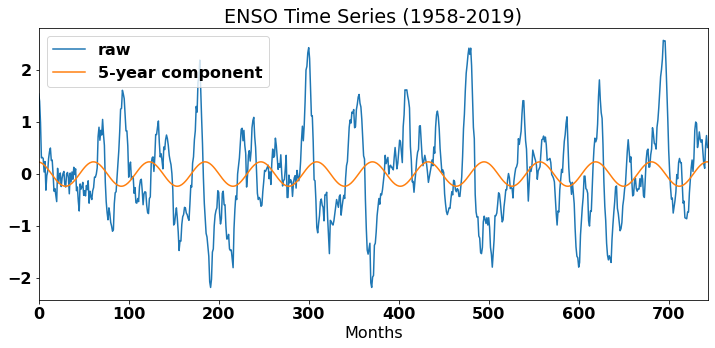

In [51]:
# plot original ENSO time series and 5-year component
plt.figure(figsize=(12,5))
plt.plot(ENSO,label='raw')
plt.plot(ENSO_5yr, label='5-year component')
plt.title('ENSO Time Series (1958-2019)')
plt.xlabel('Months')
plt.xlim(0,len(ENSO))
plt.legend()
plt.show()

## Variance Explained: Discrete Fourier Transform!

Back to examining $y(t)$ regressed on the harmonic components. We can express the *fraction of variance explained* by each harmonic component in the same way that we did for linear regression. Specifically, the fraction of variance explained by wavenumber, $k$, is,

$$
R_k^2 = \frac{(\overline{x_k^{\prime}y^{\prime}})^2}{\overline{x_k^{\prime 2}}\overline{y^{\prime 2}}}
$$


This should look very similar to the *coefficient of determination* for linear regression, but now we can write down an $R$-squared for each wavenumber.

Noticing that much of this expression looks like the expressions for $A_k$ and $B_k$, we can re-write the above as,

$$
\begin{align}
R_k^2 &= \frac{A_k^2}{2\overline{y^{\prime 2}}} \quad \text{for the cosine functions}\\
R_k^2 &= \frac{B_k^2}{2\overline{y^{\prime 2}}} \quad \text{for the sine functions}\\
R_k^2 &= \frac{A_{N/2}^2}{\overline{y^{\prime 2}}} \quad \text{for the special case of $k=N/2$}
\end{align}
$$

This is basically what we want in order to determine how much of the variance in $y(t)$ comes from different harmonic components. Thus, the fraction of variance explained by each harmonic pair (sine + cosine) is,

$$
\begin{align}
R_k^2 &= \frac{A_k^2 + B_k^2}{2\overline{y^{\prime 2}}}\\
& = \frac{C_k^2}{2\overline{y^{\prime 2}}}
\end{align}
$$

We can approximate the variance of $y(t)$ as $\frac{\sum_{k=1}^{N/2}C_k^2}{2}$ such that,

$$
R_k^2 = \frac{C_k^2}{\sum_{k=1}^{N/2}C_k^2}
$$

We have just found the **discrete Fourier Transform**! A plot of $\frac{C_k^2}{\sum_{k=1}^{N/2}C_k^2}$ versus $k$ or $f$ is the *discrete power spectrum* of $y(t)$, where we use the word *power* and *variance* interchangeably. [Figure 21](DFT) shows discrete Fourier Transforms of a sine wave and a square wave.



```{figure} DFTs.png
---
scale: 80%
name: DFT
---
Discrete Fourier Transforms (DFT) of (a) a sine wave (k = 4) and (b) a square wave.
```

Now, let's take a look at the DFT of the ENSO time series. We will loop over all the possible wavenumbers from $k$ = 1 to $k$ = $N$/2 and compute the corresponding fraction of variance expained.

In [197]:
# compute variance as a function of k
time = np.arange(0,len(ENSO))
k_all = np.arange(1,len(ENSO)/2+1)
ck2 = []
for i in k_all:
    T = float(len(ENSO))
    k = i
    theta = 2*np.pi*time*k/T
    
    coskd = np.cos(theta)
    sinkd = np.sin(theta)
    
    ak = ENSO*coskd
    bk = ENSO*sinkd

    ak_mean = np.mean(ak)*2
    bk_mean = np.mean(bk)*2
    
    #Use the Pythagorean Theorem to convert to amplitude and phase format
    ck2.append((ak_mean**2 + bk_mean**2)/2)
ck2 = np.asarray(ck2)

Let's check that the variance of the ENSO time series is roughly approximated by $\frac{\sum_{k=1}^{N/2}C_k^2}{2}$

In [199]:
# compare variance of ENSO with total variance of harmonic components
print(np.round(np.var(ENSO),5),np.round(np.sum(ck2),5))

0.6886 0.68873


Pretty close - great! Now, let's plot the fraction of variance explained, sometimes called the *normalized power*, as a function of wavenumber, $k$.

Text(0.5, 0, 'Wavenumber')

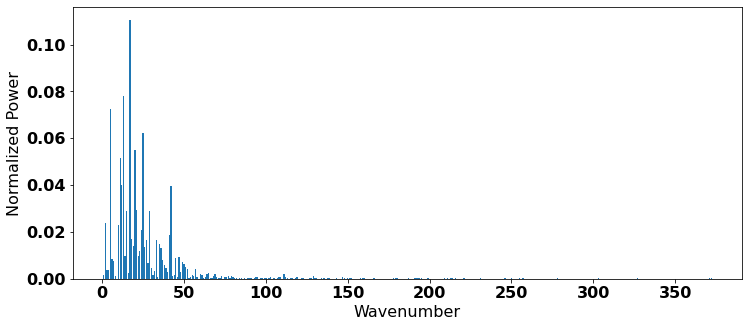

In [200]:
# plot discrete power spectrum
plt.figure(figsize=(12,5))
plt.bar(k_all,ck2/np.sum(ck2))
plt.ylabel('Normalized Power')
plt.xlabel('Wavenumber')

Most of the power is in the low frequencies. Let's see which frequencies these are:

In [214]:
# compute frequencies that correspond to first 62 wavenumbers
f = k_all[0:62]/T

# print in terms of years
print(1/(12*f))

[62.         31.         20.66666667 15.5        12.4        10.33333333
  8.85714286  7.75        6.88888889  6.2         5.63636364  5.16666667
  4.76923077  4.42857143  4.13333333  3.875       3.64705882  3.44444444
  3.26315789  3.1         2.95238095  2.81818182  2.69565217  2.58333333
  2.48        2.38461538  2.2962963   2.21428571  2.13793103  2.06666667
  2.          1.9375      1.87878788  1.82352941  1.77142857  1.72222222
  1.67567568  1.63157895  1.58974359  1.55        1.51219512  1.47619048
  1.44186047  1.40909091  1.37777778  1.34782609  1.31914894  1.29166667
  1.26530612  1.24        1.21568627  1.19230769  1.16981132  1.14814815
  1.12727273  1.10714286  1.0877193   1.06896552  1.05084746  1.03333333
  1.01639344  1.        ]


This is consistent with what we know about ENSO - it is a low-frequency oscillation with the majority of the power in the 3-7 year range.

### Drawbacks of DFT:

While the discrete power spectrum is fine if we have an infinite sample, it has serious drawbacks if we only have a finite data record:

- integral values of $k$ do not have any special relationship to the population being sampled, and are completely dependent on the length of the data record $T$ which is presumably arbitrary.

- the individual spectral lines each contain about 2 degrees of freedom: $N$+1 data points were used to determine, $N$/2 amplitudes and $N$/2 - 1 phases.

- except for diurnal/seasonal cycles, most geophysical phenomena are only quasi-periodic, and thus, do not conform to the idea of a single integer wavenumber, but are likely better represented as spectral bands of finite width.

These considerations suggest the notion of a **continuous power spectrum**, where the variance $y(t)$ is given per unit frequency (or wavenumber). This is what we will cover in the next section.